In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input_file='/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET'
output_file='/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted'

In [ ]:
splitfolders.ratio(input_file,output=output_file,seed=38,ratio=(.75,.25),group_prefix=None)

Copying files: 948 files [03:33,  4.44 files/s]


In [1]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#PreTrained Model
from tensorflow.keras.applications import *
#Image Generator DataAugmentation
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
#Splitting Data
# import splitfolders
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
from sklearn.cluster import KMeans
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

In [2]:
# Directory containing the "Train" folder
directory = "/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/train"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [3]:
# Head
df_train

,filepath,label
0,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,nitrogen-N
1,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,nitrogen-N
2,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,nitrogen-N
3,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,nitrogen-N
4,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,nitrogen-N
...,...,...
702,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,potasium-K
703,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,potasium-K
704,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,potasium-K
705,/content/drive/MyDrive/Colab Notebooks/CoLeaf ...,potasium-K


In [4]:
#Data_Dir
data_dir = '/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/train'

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

Training Images:
Found 707 files belonging to 10 classes.
Using 637 files for training.
Validation Images:
Found 707 files belonging to 10 classes.
Using 70 files for validation.


In [5]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/val',
    batch_size = 32,
    image_size = (256, 256),
    label_mode = None,
    shuffle=False
)
test_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

Found 241 files belonging to 1 classes.


In [6]:
# Names of the classes
class_names = train_ds.class_names


# Print the class indices
print("Class indices for training generator:", class_names)

Class indices for training generator: ['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']


In [7]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [9]:
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

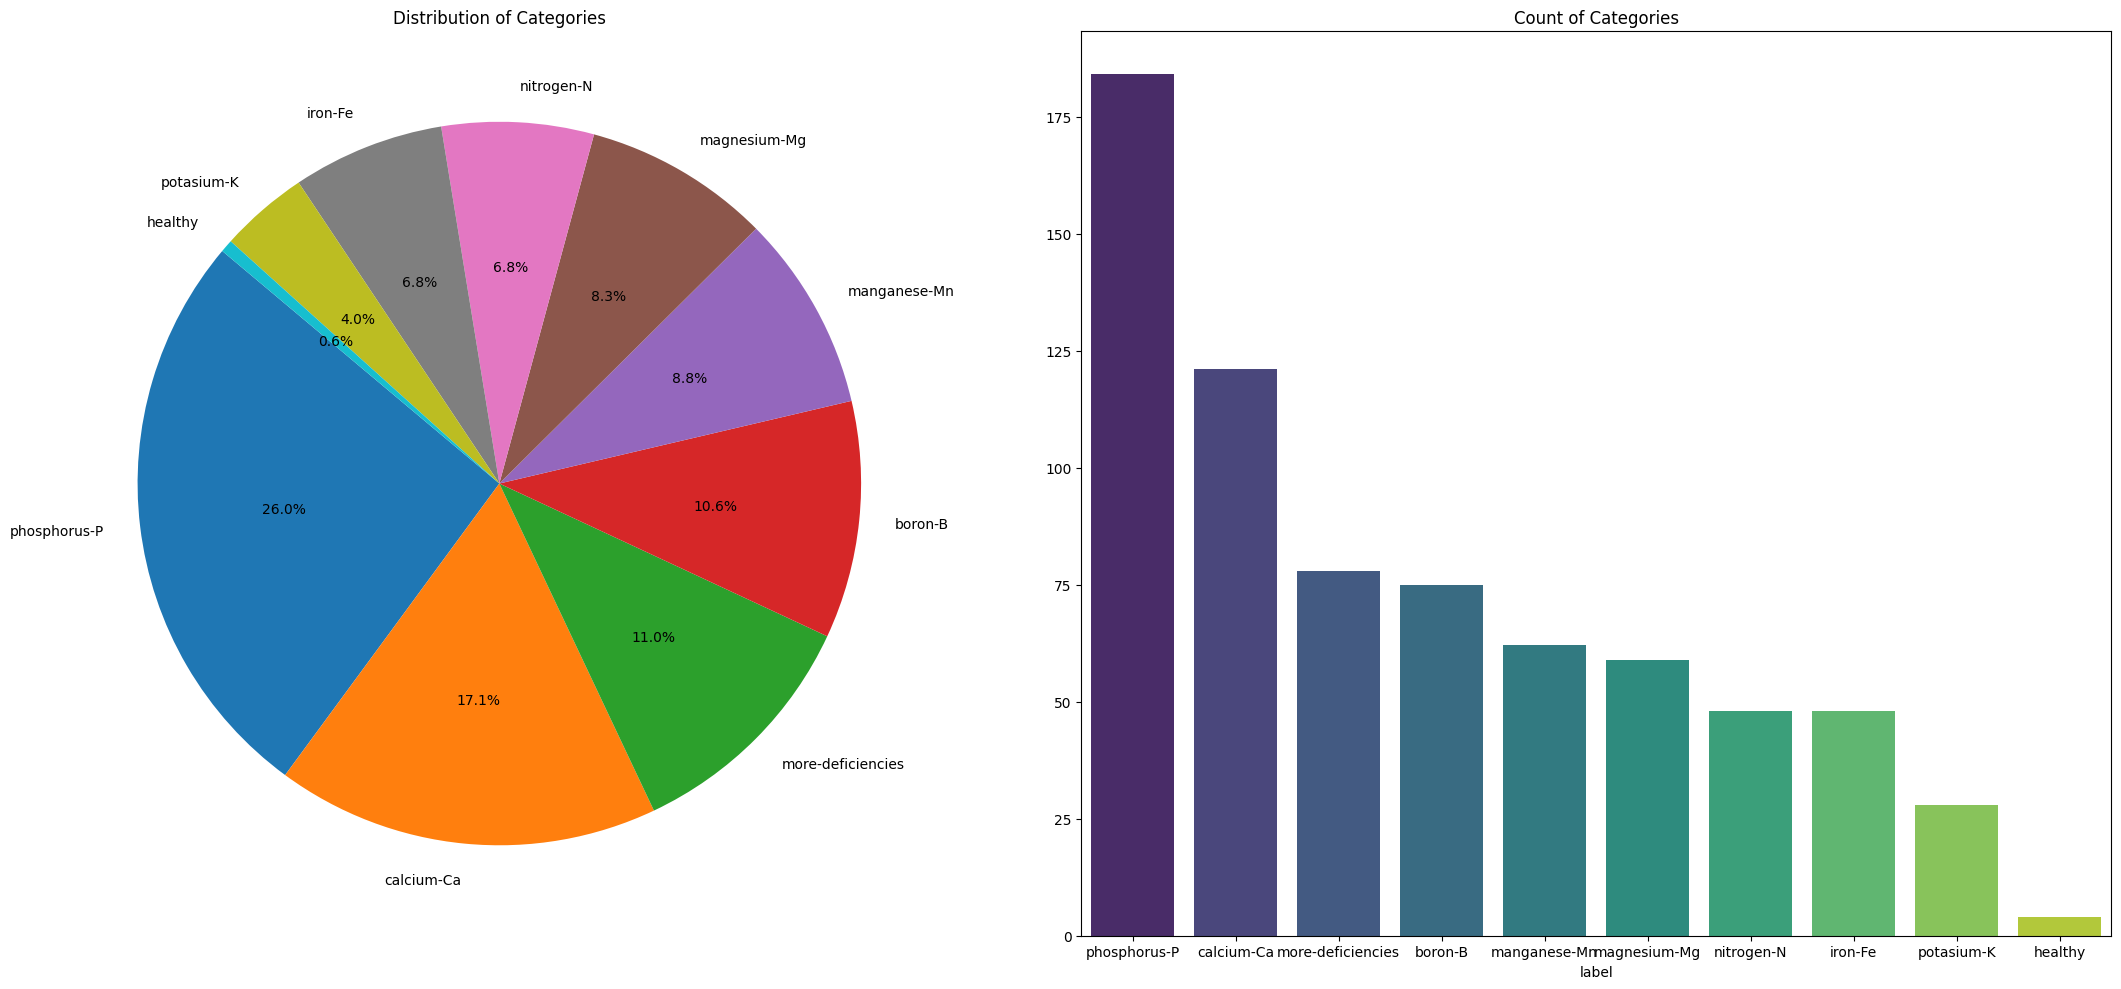

In [10]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(22, 10), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


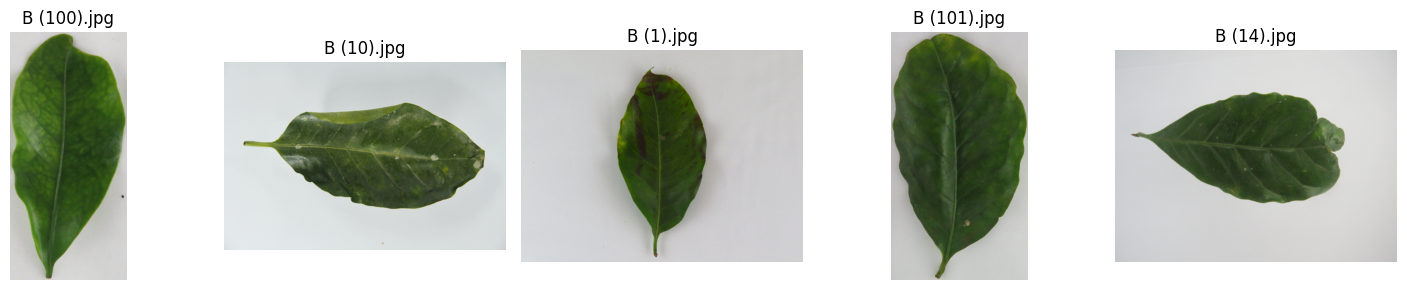

In [11]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/train/boron-B"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

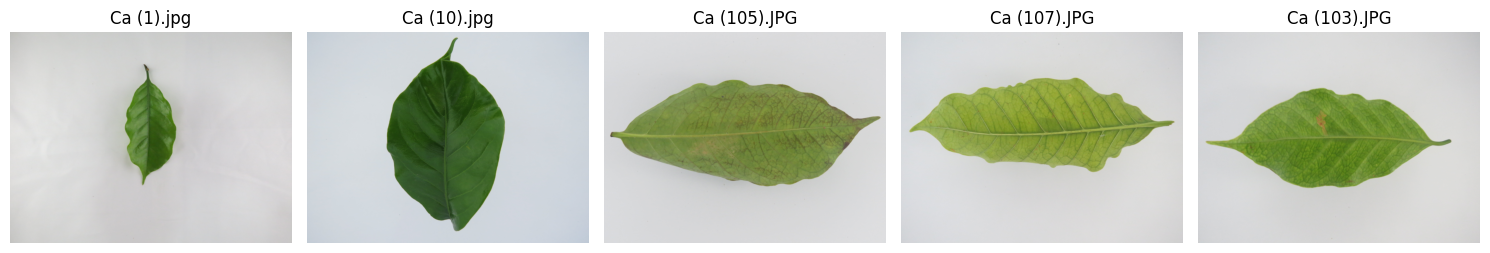

In [12]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/train/calcium-Ca"
# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

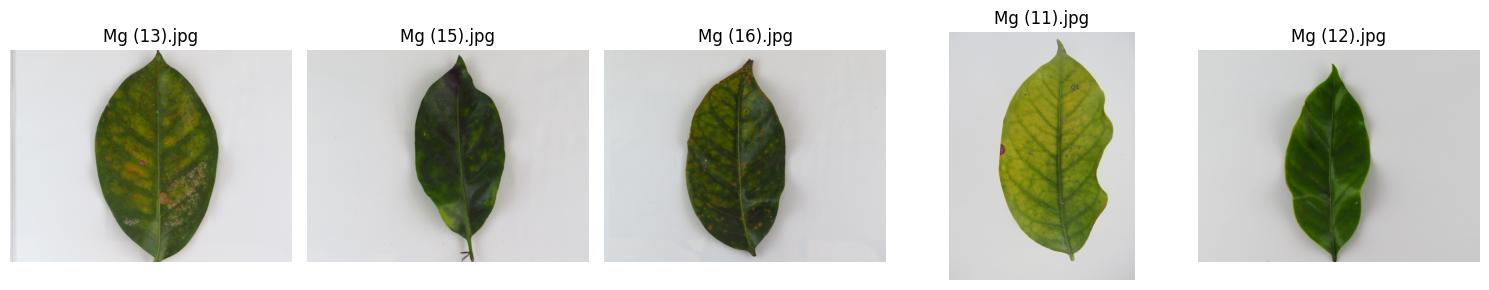

In [13]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/Colab Notebooks/CoLeaf DATASET splitted/train/magnesium-Mg"
# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [ ]:
# Load the pre-trained DenseNet121 model without the top classification layer
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False,
                                   input_shape=(256, 256, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Build the model
model = Sequential()

# Add the pre-trained DenseNet121_base
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization())

#Dropout
model.add(Dropout(0.2))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))


# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 220)               225500    
                                                                 
 dense_1 (Dense)             (None, 10)                2210      
                                                                 
Total params: 7269310 (27.73 MB)
Trainable params: 229758 (897.49 KB)
Non-trainable params: 7039552 (26.85 MB)
___________

In [ ]:
#Early_Stopping
early_stopping = EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

# Train the model
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=validation_ds,
                    callbacks=early_stopping)

Epoch 1/20
20/20 [==============================] - 247s 11s/step - loss: 0.7955 - accuracy: 0.7143 - val_loss: 1.3456 - val_accuracy: 0.5286
Epoch 2/20
20/20 [==============================] - 224s 10s/step - loss: 0.5720 - accuracy: 0.8085 - val_loss: 1.2150 - val_accuracy: 0.5857
Epoch 3/20
20/20 [==============================] - 251s 11s/step - loss: 0.4417 - accuracy: 0.8728 - val_loss: 1.0754 - val_accuracy: 0.6000
Epoch 4/20
20/20 [==============================] - 248s 11s/step - loss: 0.3634 - accuracy: 0.8964 - val_loss: 1.0226 - val_accuracy: 0.6143
Epoch 5/20
20/20 [==============================] - 252s 11s/step - loss: 0.3114 - accuracy: 0.9199 - val_loss: 0.9193 - val_accuracy: 0.6571
Epoch 6/20
20/20 [==============================] - 242s 11s/step - loss: 0.2473 - accuracy: 0.9403 - val_loss: 0.8833 - val_accuracy: 0.6429
Epoch 7/20
20/20 [==============================] - 247s 11s/step - loss: 0.2005 - accuracy: 0.9482 - val_loss: 0.8297 - val_accuracy: 0.6714
Epoch 

In [ ]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

3/3 [==============================] - 24s 5s/step - loss: 0.8022 - accuracy: 0.7000
Validation Loss: 0.8021731376647949
Validation Accuracy: 0.699999988079071


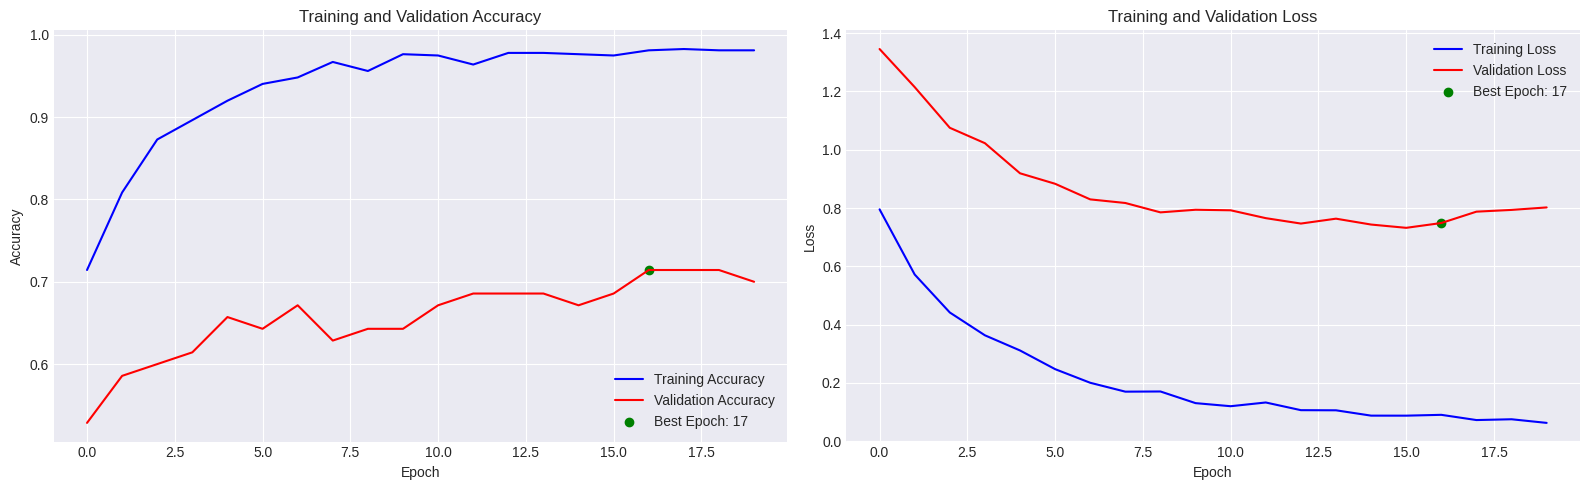

In [ ]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Saved Models/DenseNet121_fine_tuned.h5")